Hola como estas

In [2]:
import pandas as pd

Isabela

In [ ]:
df_coolers = pd.read_csv('coolers.csv')

In [10]:
df_warning = pd.read_csv('warnings.csv')

In [11]:
df_warning = df_warning.rename(columns={'cooler_id': 'Warning'})



In [ ]:

df_limpio = df_coolers.dropna(subset=['door_opens', 'open_time'])

In [13]:

df_merged = pd.merge(df_limpio, df_warning, left_on='cooler_id', right_on='Warning', how='left')


In [14]:
df_merged = df_merged.dropna(subset=['temperature'])

In [15]:
print(df_merged.columns)

Index(['cooler_id', 'door_opens', 'open_time', 'compressor', 'power',
       'on_time', 'min_voltage', 'max_voltage', 'temperature', 'calday',
       'Warning'],
      dtype='object')


In [16]:
df_merged = df_merged.dropna(subset=['min_voltage'])

CALENDAR.CSV

In [30]:
df_calendar = pd.read_csv('calendar.csv')
df_clean_calday = df_calendar.copy()
# Convertir a datetime y luego extraer componentes calday
df_clean_calday['calday_format'] = pd.to_datetime(df_calendar['calday'], format='%Y%m%d')
df_clean_calday['year'] = df_clean_calday['calday_format'].dt.year
df_clean_calday['month'] = df_clean_calday['calday_format'].dt.month
df_clean_calday['day'] = df_clean_calday['calday_format'].dt.day
df_clean_calmonth = df_calendar.copy()
# Convertir a datetime y luego extraer componentes de calmonth
df_clean_calmonth['calmonth'] = pd.to_datetime(df_calendar['calmonth'], format='%Y%m')
df_clean_calmonth['year'] = df_clean_calmonth['calmonth'].dt.year
df_clean_calmonth['month'] = df_clean_calmonth['calmonth'].dt.month
df_clean_calday

,calday,calmonth,day,calday_format,year,month
0,20230101,202301,1,2023-01-01,2023,1
1,20230102,202301,2,2023-01-02,2023,1
2,20230103,202301,3,2023-01-03,2023,1
3,20230104,202301,4,2023-01-04,2023,1
4,20230105,202301,5,2023-01-05,2023,1
...,...,...,...,...,...,...
846,20250426,202504,26,2025-04-26,2025,4
847,20250427,202504,27,2025-04-27,2025,4
848,20250428,202504,28,2025-04-28,2025,4
849,20250429,202504,29,2025-04-29,2025,4


SALES.CSV

In [31]:
df_sales_month = pd.read_csv('sales.csv')
df_sales_month['calmonth'] = df_sales_month['calmonth'].astype(str)
df_sales_month['year'] = df_sales_month['calmonth'].str[:4]
df_sales_month['month'] = df_sales_month['calmonth'].str[4:6]
df_sales_month = df_sales_month.drop(columns=['calmonth'])
df_sales_month

,cooler_id,customer_id,amount,year,month
0,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,76.8887,2025,03
1,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,131.0627,2024,12
2,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,180.8420,2024,07
3,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,82.3243,2025,02
4,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,201.7541,2023,10
...,...,...,...,...,...
204731,661cc6a46677515e7801eda42d84b6242778a9d77f6062...,021ce98d216fdee3533129eb75d956978858eade78d6a4...,1244.2283,2025,04
204732,661cc6a46677515e7801eda42d84b6242778a9d77f6062...,021ce98d216fdee3533129eb75d956978858eade78d6a4...,1829.9476,2023,06
204733,661cc6a46677515e7801eda42d84b6242778a9d77f6062...,021ce98d216fdee3533129eb75d956978858eade78d6a4...,396.8060,2023,04
204734,661cc6a46677515e7801eda42d84b6242778a9d77f6062...,021ce98d216fdee3533129eb75d956978858eade78d6a4...,1818.3142,2024,06


In [32]:
# 
df_merged_calday = pd.merge(df_merged, df_clean_calday, left_on='calday', right_on='calday', how='left')

In [35]:
# Asegúrate de que los tipos coincidan
df_merged_calday['year'] = df_merged_calday['year'].astype(int)
df_sales_month['year'] = df_sales_month['year'].astype(int)

df_merged_calday['month'] = df_merged_calday['month'].astype(int)
df_sales_month['month'] = df_sales_month['month'].astype(int)

In [36]:
df_merge_all = pd.merge(df_merged_calday, df_sales_month, on=['cooler_id', 'year', 'month'], how='left')

In [37]:
df_merge_all = df_merge_all.drop(columns=['calday','calmonth','calday_format'])

In [38]:
col = 'Warning'
# Sacamos esa columna, la eliminamos y luego la agregamos al final
df_merge_all[col] = df_merge_all.pop(col)

In [28]:
# Cuantos coolers tuvieron warnnings??
# Contar cuántos coolers únicos tuvieron al menos un warning
coolers_con_warning = df_merged[df_merged['Warning'].notna()]['cooler_id'].unique()
print(f'Número de coolers con al menos un warning: {len(coolers_con_warning)}')

Número de coolers con al menos un warning: 53


In [39]:
df_merge_all.columns

Index(['cooler_id', 'door_opens', 'open_time', 'compressor', 'power',
       'on_time', 'min_voltage', 'max_voltage', 'temperature', 'day', 'year',
       'month', 'customer_id', 'amount', 'Warning'],
      dtype='object')

In [40]:
dfwarnings = df_merge_all[df_merge_all['Warning'].notna()]

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

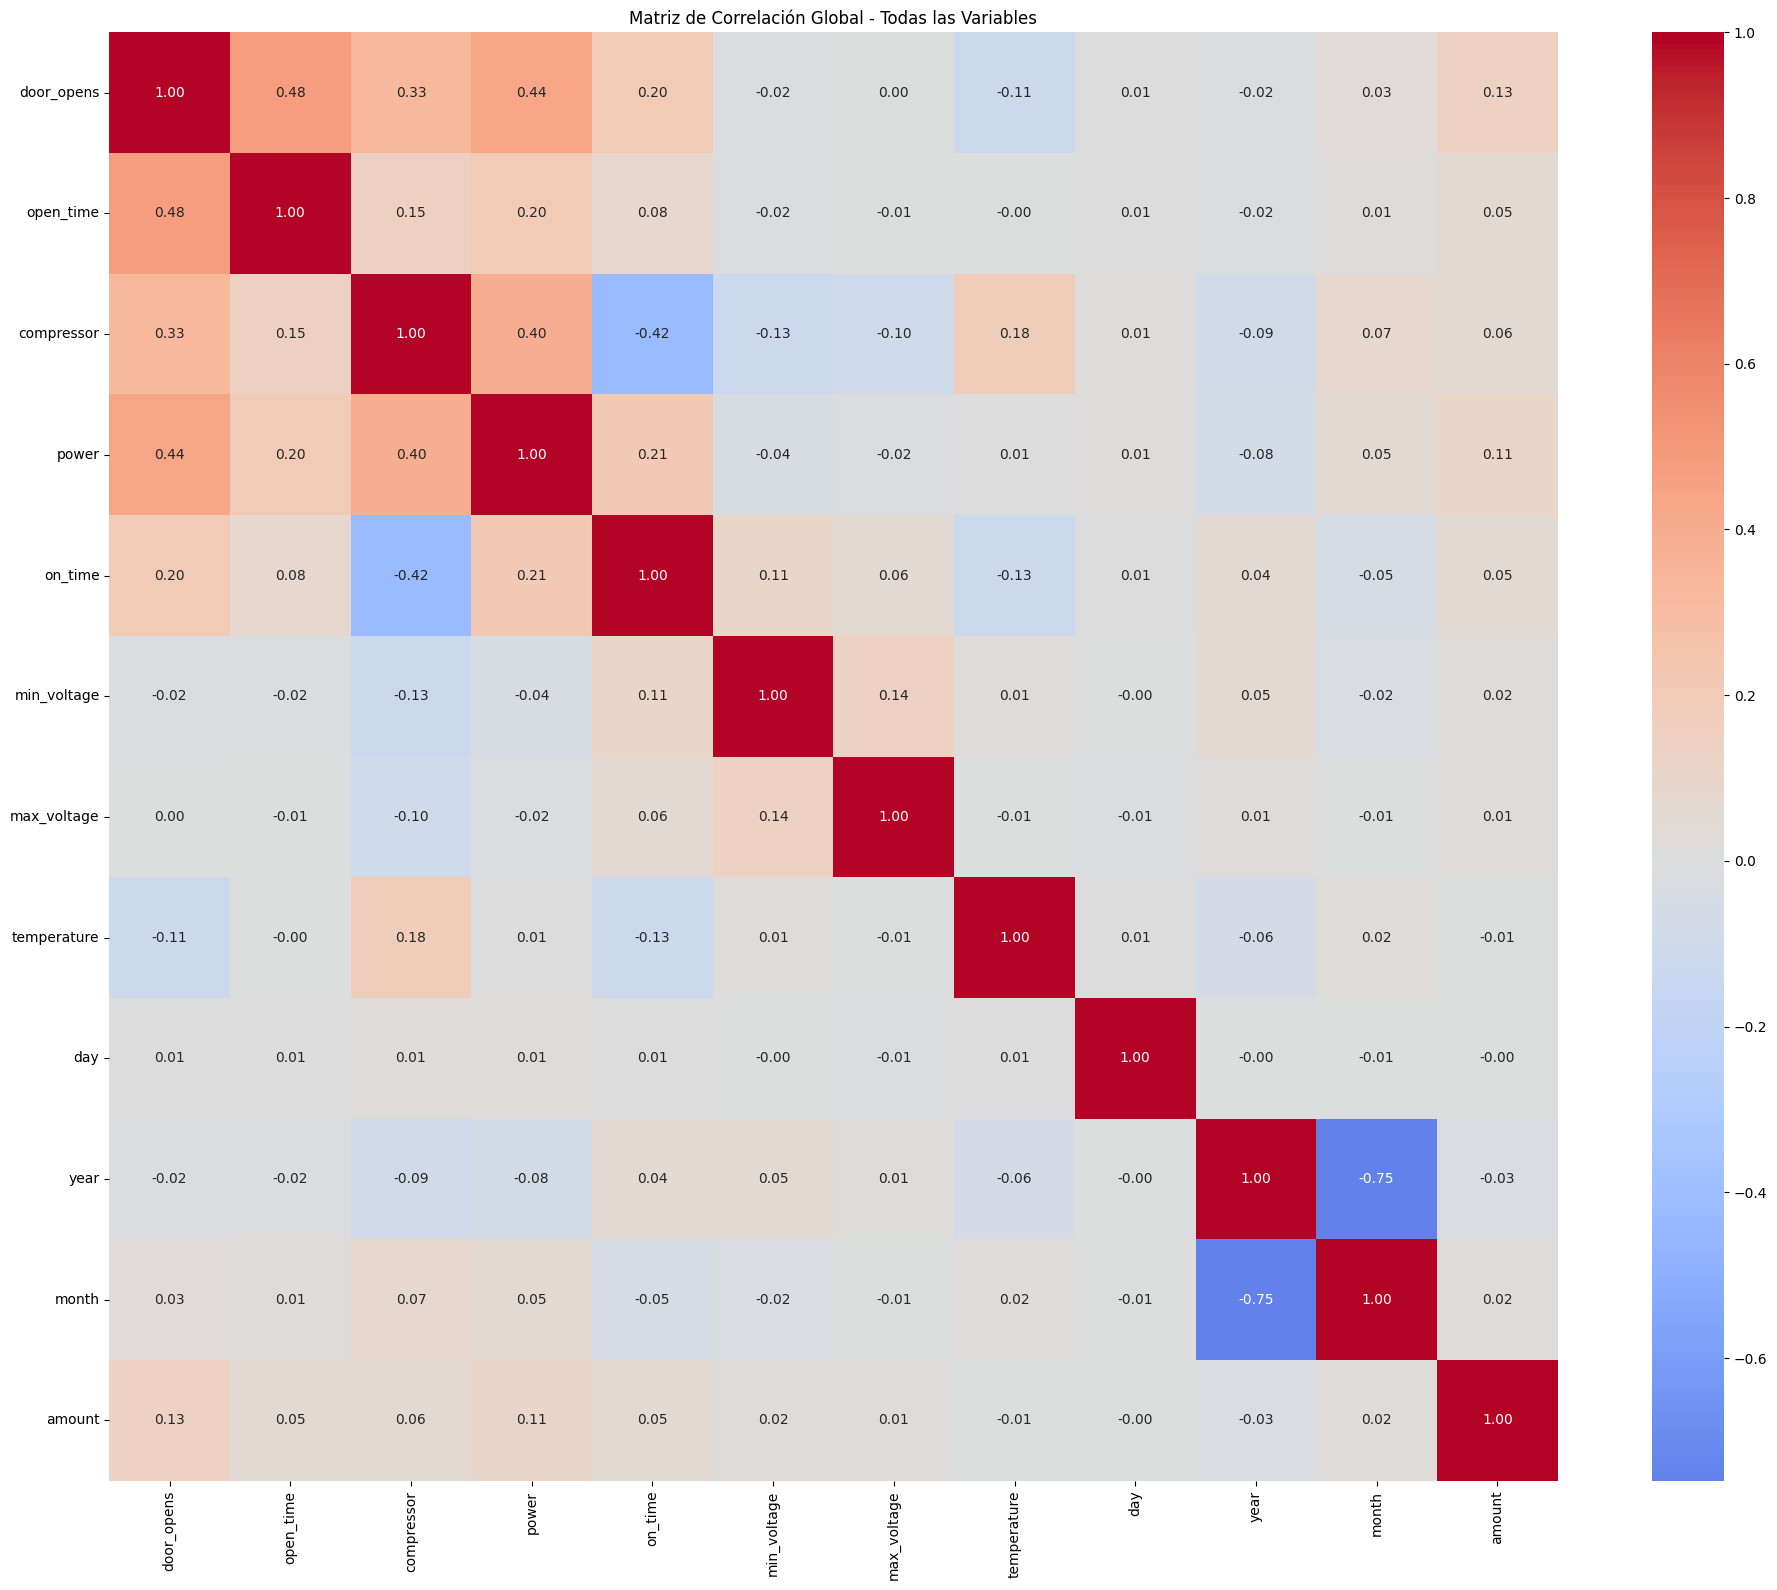

In [47]:
# 1. Matriz de Correlación Global con todas las características
def matriz_correlacion_completa():
    """
    Crea una matriz de correlación usando todas las variables numéricas del dataset
    """
    # Seleccionamos solo las columnas numéricas
    numeric_cols = df_merge_all.select_dtypes(include=[np.number]).columns
    correlation_matrix = df_merge_all[numeric_cols].corr()
    
    # Creamos una figura más grande para acomodar todas las variables
    plt.figure(figsize=(20, 16))
    sns.heatmap(correlation_matrix, 
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.2f',
                square=True,
                xticklabels=True,
                yticklabels=True)
    
    plt.title('Matriz de Correlación Global - Todas las Variables')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Llamas la función
matriz_correlacion_completa()